**股票评论词云**

In [7]:
# 导入所需的包

import jieba

import wordcloud

import pandas as pd

from matplotlib import pyplot as plt

from PIL import Image

import numpy as np






In [8]:
# 读取评论

df = pd.read_excel("./data/share_comment.xlsx")

print(df)

      Unnamed: 0                                comment         date
0              0                        看太平洋这孙子是股票市场的孙子  04-19 09:52
1              1              某润呢，某重组呢？[大笑][大笑][呲牙][呲牙]  04-18 14:08
2              2                              跌停板，我也不会卖  04-18 13:13
3              3                               玩一天，就这样了  04-18 13:10
4              4                                  拉，天天亏  04-18 12:52
...          ...                                    ...          ...
1515        1515             头条，抖音，大小发帖视频都在喊超底，古今今天跌的更狠  03-10 06:30
1516        1516                              涨就是减仓的好时机  03-10 04:28
1517        1517                        外盘大涨，我们也可能也会大涨吧  03-10 04:26
1518        1518                                   会退市吗  03-09 23:36
1519        1519  今天中午真不该喝酒！[哭]，值十万！最低点没买到！操，以后绝对开盘时间不喝  03-09 23:34

[1520 rows x 3 columns]


In [9]:
# 定义分词、过滤停用词的函数

result_word = [] 

# 加载停用词库

with open ("./data/哈工大停用词表.txt") as f:
    stop_word_list = [i.strip() for i in f.readlines()]

def division_stop_word(text):

    division_word = jieba.lcut(text)

    for i in division_word:
        if i>=u"\u4e00" and i<= u"\u9fa5":
            if i not in stop_word_list:
                result_word.append(i)


In [10]:
# 定义统计词的权重函数并建立对应的字典

word_num_dict = {}

def count_word_num(words):

    for i in  words:
        word_num_dict[i] = word_num_dict.get(i,0)+1
        

In [11]:
# 词云的绘制

def draw_word_cloub():

    mask = np.array(Image.open("./save_img/flower.png"))

    wc = wordcloud.WordCloud(font_path="/opt/anaconda/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf",
    mask = mask, max_words=50)

    wc.generate_from_frequencies(word_num_dict) 

    image_colors = wordcloud.ImageColorGenerator(mask)

    wc.recolor(color_func=image_colors)

    plt.imshow(wc)

    plt.axis("off")

    plt.show()

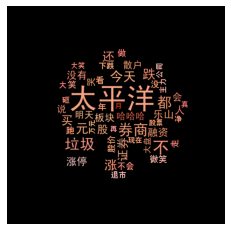

In [12]:
# 调用

df["comment"].apply(lambda x : division_stop_word(x))

count_word_num(result_word)

draw_word_cloub()

